In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getData(type='xor'):
    xd=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)
    if(type=='xor'):
        yd=np.array([[0],[1],[1],[0]],dtype=np.float32)
    if(type=='or'):
        yd=np.array([[0],[1],[1],[1]],dtype=np.float32)
    if(type=='and'):
        yd=np.array([[0],[0],[0],[1]],dtype=np.float32)
    
    return xd,yd

def plotData(x1,x2,y):
    plt.scatter(x1,x2,c=y)
    plt.colorbar()
    plt.show()

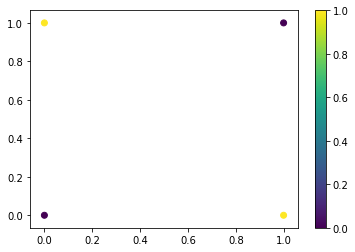

In [3]:
xd,yd=getData('xor')
plotData(xd[:,0],xd[:,1],yd.flatten())

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def forward(x,w):
    return np.matmul(x,w)

def forward_with_bias(x,w,b):
    y=np.matmul(x,w)
    for i in range(b.shape[0]):
        y[:,i] += b[i]
    return y

def crossloss(y,y_):
    return (-y*np.log(y_))-((1-y)*np.log(1-y_))

def meanloss(y,y_):
    return ((y-y_)*(y-y_))

def append_ones(arr):
    return np.concatenate((np.ones(shape=(arr.shape[0],1)),arr),axis=1)

def downstream(w,dw):
    out=np.zeros(shape=(dw.shape[0],w.shape[0]))
    for i in range(w.shape[0]):
        out[:,i:i+1]=dw*w[i]
    return out

def update_weights(w,dw,x):
    grad=np.matmul(x.T,dw)/x.shape[0]
    w = w - lr*grad
    return w

def update_biases(b,dw):
    x=np.ones(shape=(dw.shape[0],1))
    grad=np.matmul(dw.T,x)
    b = b - lr*grad
    return b

In [5]:
input_neuron=xd.shape[0]
output_neuron=yd.shape[1]
hidden_neurons=2
hidden_layers=1
num_features=xd.shape[1]

weight_hidden,bias_hidden,weight_output,bias_output = 0,0,0,0

lr=0.01

def init_weights(type="random"):
    
    global weight_hidden,bias_hidden,weight_output,bias_output
    
    if(type=="random"):
        weight_hidden=np.random.randn(num_features,hidden_neurons)
        bias_hidden=np.random.randn(hidden_neurons,1)
        weight_output=np.random.rand(hidden_neurons,output_neuron)
        bias_output=np.random.rand(output_neuron,1)
        
    else:
        weight_hidden=np.array([[1,3],[2,4]])
        bias_hidden=np.array([[1],[1]])
        weight_output=np.array([[2],[3]])
        bias_output=np.array([[-1]])
        
init_weights("random")

print(weight_hidden.shape,bias_hidden.shape)
print(weight_output.shape,bias_output.shape)

(2, 2) (2, 1)
(2, 1) (1, 1)


In [6]:
epochs=[]
losses=[]
for i in range(100000):

    hidden=sigmoid(forward_with_bias(xd,weight_hidden,bias_hidden))
    output=sigmoid(forward_with_bias(hidden,weight_output,bias_output))

    loss=crossloss(yd,output)
    epochs.append(i)
    losses.append(loss.mean())
    
    derivative_weight_output = (output-yd)
    derivative_weight_hidden = hidden*(1-hidden)
    derivative_weight_hidden *= downstream(weight_output,derivative_weight_output)

    weight_output = update_weights(weight_output,derivative_weight_output,hidden)
    bias_output = update_biases(bias_output,derivative_weight_output)

    weight_hidden = update_weights(weight_hidden,derivative_weight_hidden,xd)
    bias_hidden = update_biases(bias_hidden,derivative_weight_hidden)

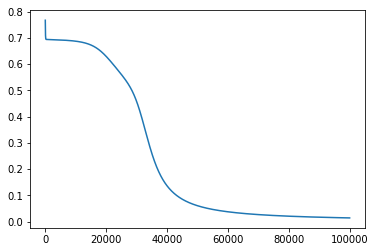

In [7]:
plt.plot(epochs,losses)

In [8]:
hidden=sigmoid(forward_with_bias(xd,weight_hidden,bias_hidden))
output=sigmoid(forward_with_bias(hidden,weight_output,bias_output))
output

array([[0.01322956],
       [0.98546105],
       [0.98548526],
       [0.01435093]])

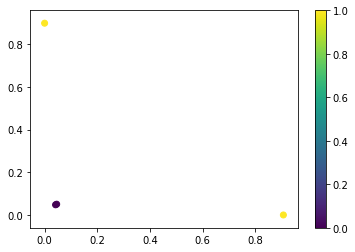

In [249]:
plotData(hidden[:,0],hidden[:,1],yd.flatten())